### Добавляем файл с 4 стольбцами и  делаем анализ

In [1]:
import numpy as np
import pandas as pd
import pathlib
from pathlib import Path
import openpyxl
from openpyxl import load_workbook
import xlrd, xlwt
import seaborn as sns

In [8]:
#Название вкладок в экселе
file_for_cleaning = input ('Ведите название файла для чистки: ')
path = Path(pathlib.Path.home(), "Desktop", file_for_cleaning+".xlsx")
wookbook = openpyxl.load_workbook(path)
print (wookbook.sheetnames)

Ведите название файла для чистки: Новая таблица
['WB']


In [9]:
#чтение эксель файла
teapot = pd.read_excel(path, sheet_name= 'WB')
df = pd.DataFrame(teapot)
df.head()

,sku,Продажи,Выручка,МД3
0,XY0005,837,294470.930000,94003.495534
1,BS0005,85,52775.220588,14180.862670
2,XY0008,67,47009.625000,10475.561850
3,BS0003,81,39396.240000,7484.192040
4,XY0024,85,25927.200000,5952.410880


In [10]:
#Вводим название столбца
revenue = 'Выручка'
sales = 'Продажи'
Margin = 'МД3'

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Выручка', ylabel='Density'>

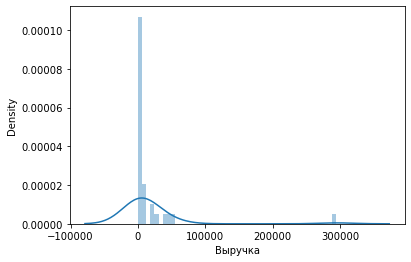

In [11]:
#Показано распределение Парето, найденное в данных. 
sns.distplot(df[revenue])

In [12]:
df['Доля Выручки'] = df[revenue]/df[revenue].sum()
df = df.sort_values('Доля Выручки', ascending=False)
df['Аккум.доля Выручки'] = df['Доля Выручки'].cumsum()
df["Категория Выручки"] = ' '
df.loc[df['Аккум.доля Выручки'] <= 0.8, 'Категория Выручки' ] = 'A'
df.loc[(df['Аккум.доля Выручки'] > 0.8) & (df['Аккум.доля Выручки'] < 0.95), 'Категория Выручки' ] = 'B'
df.loc[df['Аккум.доля Выручки'] >= 0.95, 'Категория Выручки' ] = 'C'

df['Доля Продажи'] = df[sales]/df[sales].sum()
df = df.sort_values('Доля Продажи', ascending=False)
df['Аккум.доля Продажи'] = df['Доля Продажи'].cumsum()
df["Категория Продажи"] = ' '

df.loc[df['Аккум.доля Продажи'] <= 0.8, 'Категория Продажи' ] = 'A'
df.loc[(df['Аккум.доля Продажи'] > 0.8) & (df['Аккум.доля Продажи'] < 0.95), 'Категория Продажи' ] = 'B'
df.loc[df['Аккум.доля Продажи'] >= 0.95, 'Категория Продажи' ] = 'C'

df['Доля Маржа3'] = df[Margin]/df[Margin].sum()
df = df.sort_values('Доля Маржа3', ascending=False)
df['Аккум.доля Маржа3'] = df['Доля Маржа3'].cumsum()
df["Категория Маржа3"] = ' '

df.loc[df['Аккум.доля Маржа3'] <= 0.8, 'Категория Маржа3' ] = 'A'
df.loc[(df['Аккум.доля Маржа3'] > 0.8) & (df['Аккум.доля Маржа3'] < 0.95), 'Категория Маржа3' ] = 'B'
df.loc[df['Аккум.доля Маржа3'] >= 0.95, 'Категория Маржа3' ] = 'C'

df['Категори']=df['Категория Выручки']+df['Категория Продажи']+df['Категория Маржа3']
df = df.sort_values('Категори')
df.head()

,sku,Продажи,Выручка,МД3,Доля Выручки,Аккум.доля Выручки,Категория Выручки,Доля Продажи,Аккум.доля Продажи,Категория Продажи,Доля Маржа3,Аккум.доля Маржа3,Категория Маржа3,Категори
0,XY0005,837,294470.930000,94003.495534,0.520751,0.520751,A,0.563636,0.563636,A,0.636513,0.636513,A,AAA
1,BS0005,85,52775.220588,14180.862670,0.093329,0.614080,A,0.057239,0.620875,A,0.096021,0.732534,A,AAA
2,XY0008,67,47009.625000,10475.561850,0.083133,0.697213,A,0.045118,0.777778,A,0.070932,0.803466,B,AAB
3,BS0003,81,39396.240000,7484.192040,0.069669,0.766883,A,0.054545,0.732660,A,0.050677,0.854143,B,AAB
4,XY0024,85,25927.200000,5952.410880,0.045850,0.812733,B,0.057239,0.678114,A,0.040305,0.894448,B,BAB


In [14]:
#Создание файла Эксель со вкладкой
file_zapiz = input ('Ведите название файла для записи: ')
df.to_excel(file_zapiz +'  ABC вывод.xlsx', sheet_name='ABC', index=False) 

Ведите название файла для записи: WB XY
